In [12]:
from __future__ import division
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import cmath
import time

    
def DFTloop(x,N):
    X = []
    for k in range(N):
        s = 0
        for n in range(N):
            s = s + x[n]*cmath.exp(complex(0,-(2*np.pi*k*n)/N))
        X.append(s)
    return (X)

def DFTmat(x,N):
    W = []
    for k in range(N):
        w = []
        for n in range(N):
            w.append(cmath.exp(complex(0,-(2*np.pi*k*n)/N)))
        W.append(w)
    W_ = np.array(W)
    x_ = np.array(x)
    X = np.matmul(W_,x_)
    return (X)

def IDFTmat(X,N):
    W = []
    for n in range(N):
        w = []
        for k in range(N):
            w.append(cmath.exp(complex(0,(2*np.pi*k*n)/N)))
        W.append(w)
    W_ = np.array(W)/float(N)
    X_ = np.array(X)
    x = np.matmul(W_,X_)
    return (x)

    
N=4
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
print(x)  
X=DFTmat(x,N)

print(X)

ix=IDFTmat(X,N)
print(ix)

X=DFTloop(x,N)

print(X)
e=0
for i in range(0,N-1,1):
    e=e+np.abs(x[i]-X[i])**2
print(e)

[(0.2541632919565313+0.7066942517654674j), (0.03919647636096302+0.7769420224932425j), (0.6980999649277078+0.041814077503202096j), (0.5014935535051528+0.15325039051364897j)]
[ 1.49295329+1.67870074j  0.17975496+1.12717725j  0.41157323-0.18168408j
 -1.0676283 +0.2025831j ]
[0.25416329+0.70669425j 0.03919648+0.77694202j 0.69809996+0.04181408j
 0.50149355+0.15325039j]
[(1.492953286750355+1.678700742275561j), (0.17975495900841712+1.1271772514064549j), (0.4115732270181235-0.181684083738222j), (-1.0676283049507695+0.20258309711807532j)]
2.7538676710264807


In [27]:
from __future__ import division
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import cmath
import time

    
def DCTloop(x,N):
    X = []
    for k in range(N):
        s = 0
        for n in range(N):
            s = s + x[n]*np.cos(np.pi*k*(n+0.5)/N)
        X.append(s)
    return (X)

def DCTmat(x,N):
    W = []
    for k in range(N):
        w = []
        for n in range(N):
            w.append(np.cos(np.pi*k*(n+0.5)/N))
        W.append(w)
    W_ = np.array(W)
    x_ = np.array(x)
    X = np.matmul(W_,x_)
    return (X)


def IDCTmat(X,N):
    W = []
    w = []
    for k in range(N):
        w = []
        w.append(0.5)
        for n in range(1,N,1):
            w.append(np.cos(np.pi*n*(k+0.5)/N))
        W.append(w)
    W_ = float(2)*np.array(W)/float(N)
    X_ = np.array(X)
    x = np.matmul(W_,X_)
    return (x)

    
N=4
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
print(x)
    
X=DCTmat(x,N)
print(X)

ix=IDCTmat(X,N)
print(ix)

e=0
for i in range(0,N-1,1):
    e=e+np.abs(x[i]-X[i])**2
print(e)

[(0.026967256298215725+0.15393281993663865j), (0.7332499150455923+0.630379572623239j), (0.6441077597155631+0.5743897138021915j), (0.8399237779629194+0.5034973777653887j)]
[ 2.24424871+1.86219948j -0.71696067-0.30152915j -0.36095442-0.38702718j
 -0.3934616 -0.18550045j]
[0.02696726+0.15393282j 0.73324992+0.63037957j 0.64410776+0.57438971j
 0.83992378+0.50349738j]
12.740549066313067


In [48]:
def haarMatrix(N):
    # Allow only size n of power 2
    N = 2**np.ceil(np.log2(N))
    if N > 2:
        h = haarMatrix(N / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    h_i = np.sqrt(N/2)*np.kron(np.eye(len(h)), [1, -1])    
    # combine parts
    h = np.vstack((h_n, h_i))
    return (h)

def Haar(x,N):
    W = []
    W = haarMatrix(N)/float(2)
    x_ = np.array(x)
    X = np.matmul(W,x_)
    return (X)

def IHaar(x,N):
    W = []
    W = haarMatrix(N)
    W = float(2)*np.transpose(W)/float(N)
    x_ = np.array(x)
    X = np.matmul(W,x_)
    return (X)

N=8
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
    
print(x)
    
X=Haar(x,N)
print(X)

ix=IHaar(X,N)
print(ix)

e=0
for i in range(0,N-1,1):
    e=e+np.abs(x[i]-X[i])**2
print(e)

[(0.5934907001555281+0.799826669882966j), (0.8865182992536559+0.7227329190580963j), (0.24581425771010335+0.5980468764396704j), (0.1357571717211088+0.12394857868689735j), (0.2525514342126608+0.722237795740172j), (0.07614568419725865+0.2508028501121391j), (0.12214910274404656+0.9578481831316961j), (0.371818953973171+0.6525936278391428j)]
[ 1.3421228 +2.41401875j  0.51945763-0.16946371j  0.77671265+0.56608433j
 -0.1168642 -0.45071069j -0.2930276 +0.07709375j  0.11005709+0.4740983j
  0.17640575+0.47143495j -0.24966985+0.30525456j]
[0.5934907 +0.79982667j 0.8865183 +0.72273292j 0.24581426+0.59804688j
 0.13575717+0.12394858j 0.25255143+0.7222378j  0.07614568+0.25080285j
 0.1221491 +0.95784818j 0.37181895+0.65259363j]
5.778159775216452


Text(0,0.5,'E(L)')

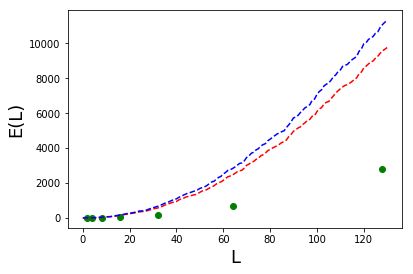

In [49]:
N=132
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
L= np.arange(N-1)
eX= np.zeros(N-1)
eY= np.zeros(N-1)
eZ= np.zeros(N-1)

for i in range(1,8,1):
    m=int(2**i)
    X=Haar(x[0:m],m)
    for j in range(0,m-1,1):
        eX[m]=eX[m]+np.abs(x[j]-X[j])**2

for i in range(1,N-1,1):
    Y=DCTmat(x[0:i],i)
    Z=DFTmat(x[0:i],i)
    for k in range(0,i-1,1):
        eY[i]=eY[i]+np.abs(x[k]-Y[k])**2
    for l in range(0,i-1,1):
        eZ[i]=eZ[i]+np.abs(x[l]-Z[l])**2
eX[eX==0]=np.nan

fig,ax = plt.subplots()
ax.plot(L,eX,'og-')
ax.plot(L,eY,'r--')
ax.plot(L,eZ,'b--')
ax.set_xlabel('L',fontsize = 18)
ax.set_ylabel('E(L)',fontsize = 18) 

Text(0,0.5,'E(L)')

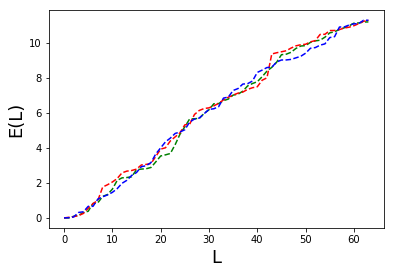

In [52]:
N=64
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
XDFT=DFTmat(x,N)
#print (XDFT)
XDCT=DCTmat(x,N)
XHaar=Haar(x,N)
XDFT_=DFTmat(x,N)
XDCT_=DCTmat(x,N)
XHaar_=Haar(x,N)
L= np.arange(N)
eX= np.zeros(N)
eY= np.zeros(N)
eZ= np.zeros(N)
for l in range(N):
    for i in range(int((N+1-l)/2),int((N-1+l)/2),1):
        XDFT[i]=0
    #print (XDFT)
    xdft=IDFTmat(XDFT,N)
    for j in range(N):
        eX[l]=eX[l]+np.abs(x[j]-xdft[j])**2
for l in range(N):
    for i in range(N-l,N,1):
        XDCT[i]=0
    xdct=IDCTmat(XDCT,N)
    for j in range(N):
        eY[l]=eY[l]+np.abs(x[j]-xdct[j])**2
for l in range(N):
    for i in range(N-l,N,1):
        XHaar[i]=0
    xhaar=IHaar(XHaar,N)
    for j in range(N):
        eZ[l]=eZ[l]+np.abs(x[j]-xhaar[j])**2
fig,ax = plt.subplots()
ax.plot(L,eX,'g--')
ax.plot(L,eY,'r--')
ax.plot(L,eZ,'b--')
ax.set_xlabel('L',fontsize = 18)
ax.set_ylabel('E(L)',fontsize = 18) 